# Customer_Churn_Analysis 


# 1. Business Understanding

## 1.1 Problem Definition
- **Problem**: Predict ability to retain cutomers for a Telco.
- **Objective**: Develop strategies to retain customers and reduce churn.

## 1.2 Bussiness Objectives
- Develop strategies to retain customers

# 2. Data Understanding
## 2.1 Data Collection
**Source**: Customer_churn.csv (7,040+ rows) and 21 columns

- customerID: Unique identifier for each customer.
- gender: Customer's gender (e.g., Male, Female).
- SeniorCitizen: Binary indicator of whether the customer is a senior citizen (1) or not (0).
- Partner: Binary indicator of whether the customer has a partner (Yes) or not (No).
- Dependents: Binary indicator of whether the customer has dependents (Yes) or not (No).
- tenure: Number of months the customer has been with the company.
- PhoneService: Binary indicator of whether the customer has phone service (Yes) or not (No).
- MultipleLines: Type of phone service, indicating if the customer has multiple lines.
- InternetService: Type of internet service subscribed by the customer.
- OnlineSecurity: Binary indicator of whether the customer has online security service (Yes) or not (No).
- OnlineBackup: Binary indicator of whether the customer has online backup service (Yes) or not (No).
- DeviceProtection: Binary indicator of whether the customer has device protection service (Yes) or not (No).
- TechSupport: Binary indicator of whether the customer has tech support service (Yes) or not (No).
- StreamingTV: Binary indicator of whether the customer has streaming TV service (Yes) or not (No).
- StreamingMovies: Binary indicator of whether the customer has streaming movie service (Yes) or not (No).
- Contract: Type of contract the customer has signed (e.g., Month-to-month, One year, Two years).
- PaperlessBilling: Binary indicator of whether the customer receives paperless billing (Yes) or not (No).
- PaymentMethod: Payment method used by the customer (e.g., Electronic check, Mailed check, Bank transfer, Credit card).
- MonthlyCharges: The amount charged to the customer monthly.
- TotalCharges: The total amount charged to the customer over the entire tenure.
- Churn: Binary indicator of whether the customer has churned (Yes) or not (No).

## 2.2 Data  Exploration

### I Load and Inspect the Data

In [1]:
# Import nessary tools and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report

In [2]:
data = pd.read_csv("./Customer_Churn_Dataset.csv")

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### II Check te columns and the data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### III Descriptive Statistics

In [4]:
# Summary statistics for numerical columns.
data['MonthlyCharges'] = data['MonthlyCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].apply(lambda n: float(n) if n.strip() else np.nan)

print("Summary Statistics for Numerical Columns:")
data[["TotalCharges", "MonthlyCharges","tenure"]].describe()

Summary Statistics for Numerical Columns:


,TotalCharges,MonthlyCharges,tenure
count,7032.000000,7043.000000,7043.000000
mean,2283.300441,64.761692,32.371149
std,2266.771362,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,401.450000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3794.737500,89.850000,55.000000
max,8684.800000,118.750000,72.000000


In [5]:
# Unique values and their counts for categorical columns
for column in data.select_dtypes(include='object').columns:
    count = data[column].unique().shape[0]
    print(f"{column}: {count} unique values")


customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
Churn: 2 unique values


### IV Correlation Analysis

In [6]:
# Correlation between numerical features
data.select_dtypes(include='number').corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### V Visualization
#### Distribution of Target Variable

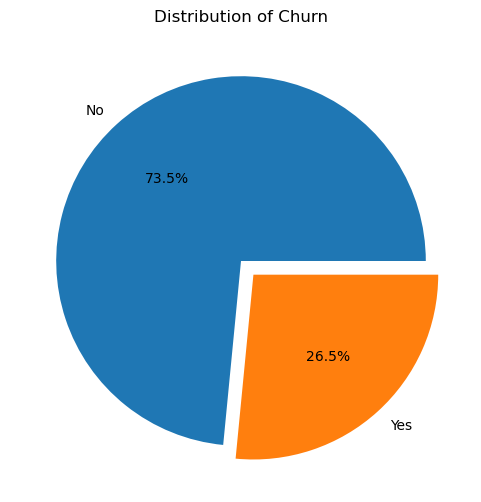

In [7]:
# Visualize the distribution of the target variable 'Churn'
churn_distribution = data['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%',explode=(0, 0.1))
plt.title('Distribution of Churn')
plt.show()

**Observations**

The dataset indicates that the majority of customers, approximately 73.5%, did not churn, while around 26.5% of customers did churn. This shows a huge imbalance in the training daset with a high number of non-churning customers

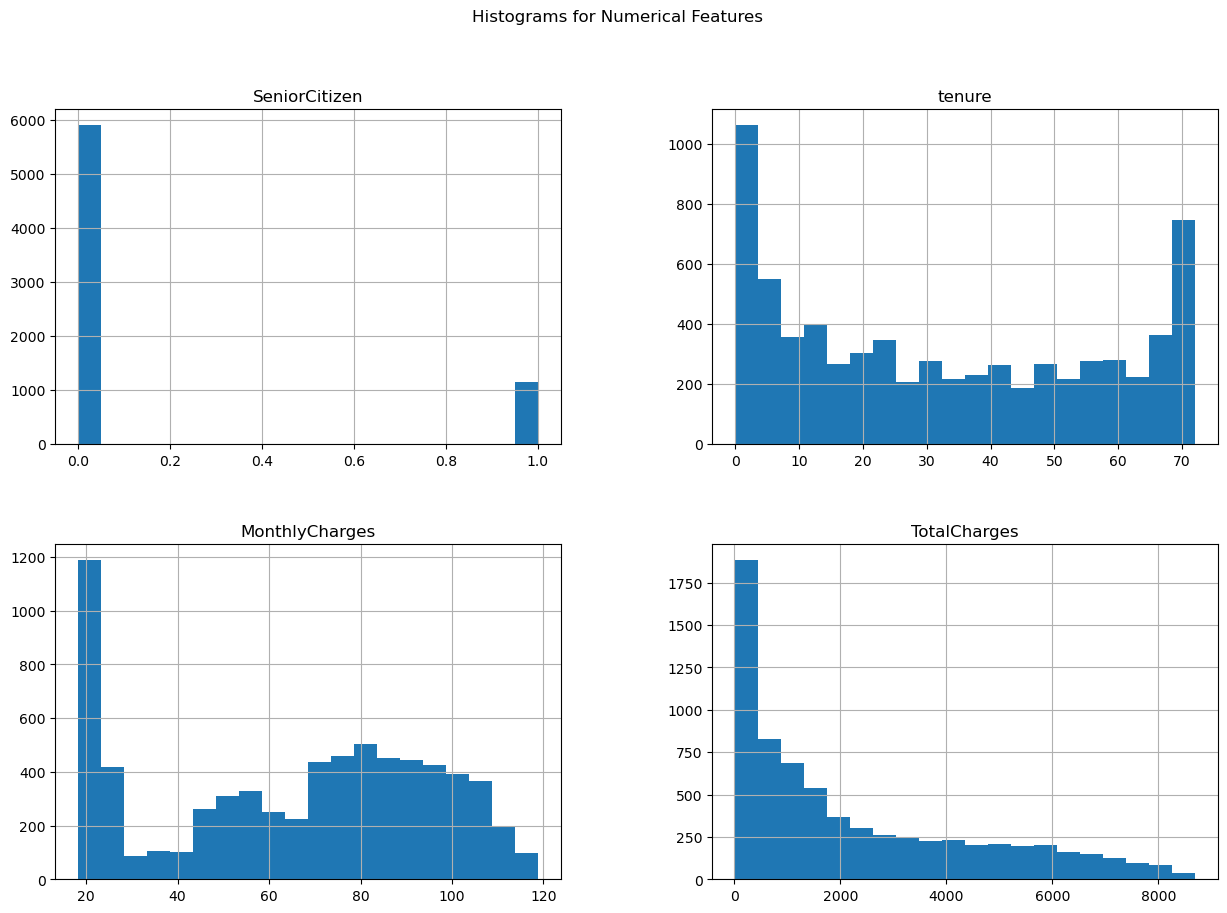

In [8]:
data.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Numerical Features")
plt.show()

#### Bivariate Analysis: Count plots for categorical features vs Churn

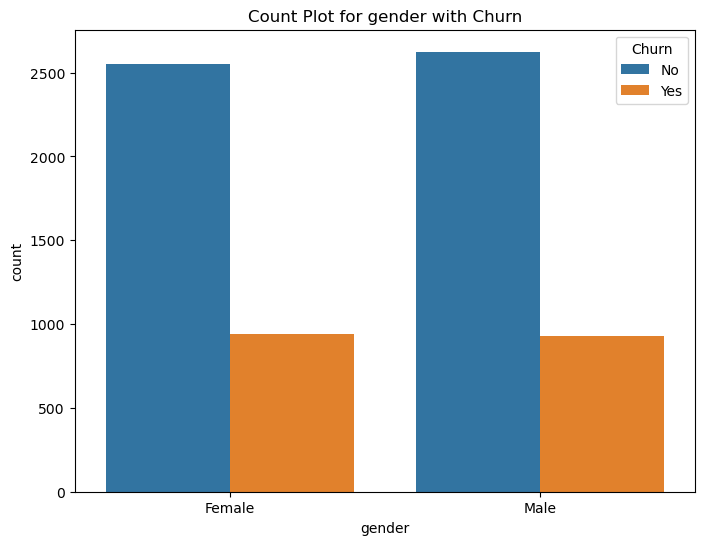


Cross Table for gender with Churn rates (Percentages)


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338
All,73.463013,26.536987


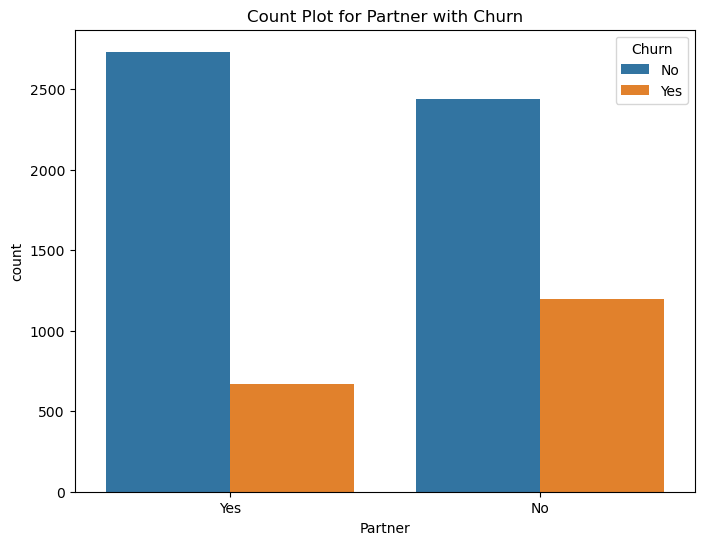


Cross Table for Partner with Churn rates (Percentages)


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903
All,73.463013,26.536987


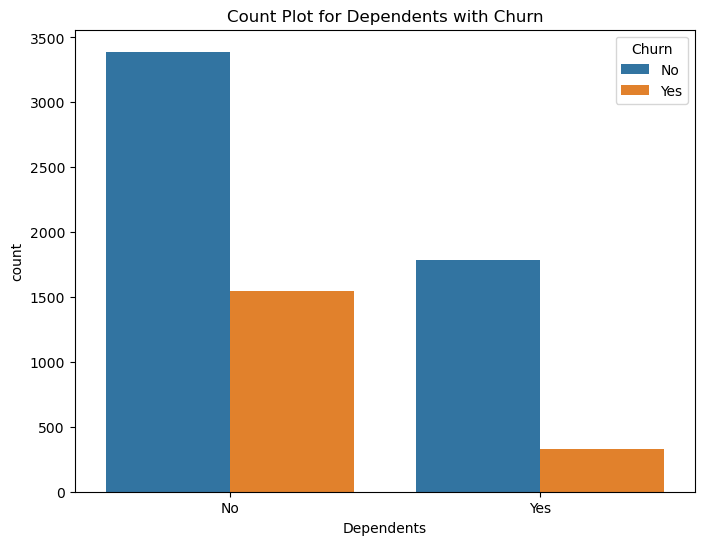


Cross Table for Dependents with Churn rates (Percentages)


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237
All,73.463013,26.536987


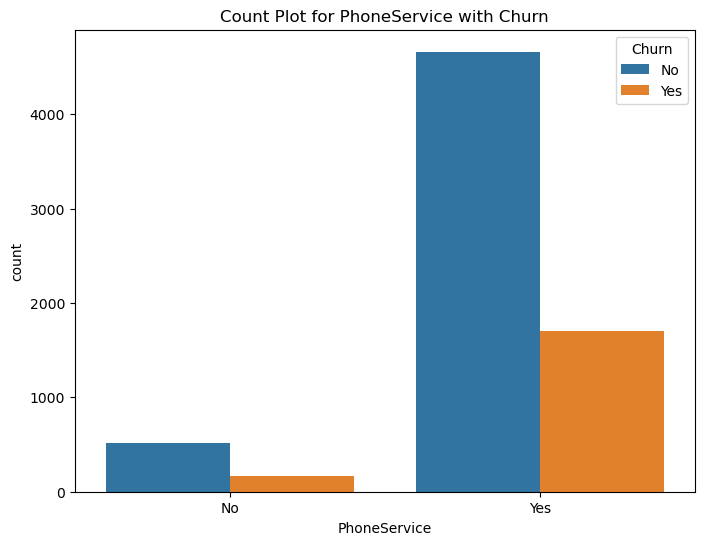


Cross Table for PhoneService with Churn rates (Percentages)


Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637
All,73.463013,26.536987


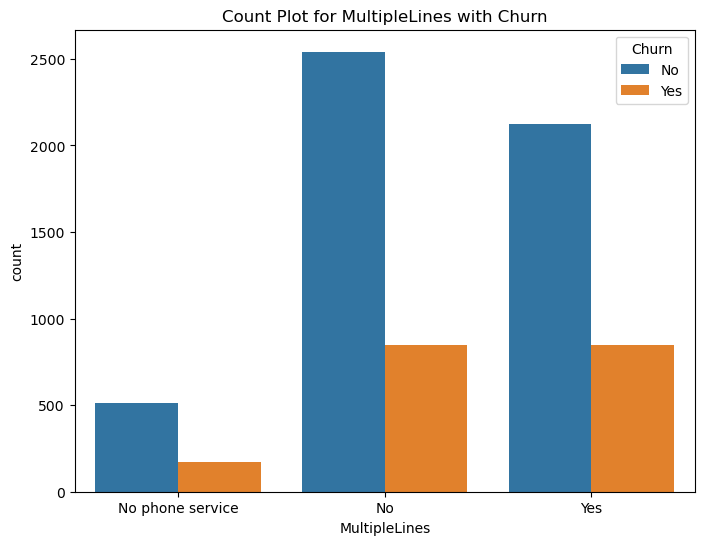


Cross Table for MultipleLines with Churn rates (Percentages)


Churn,No,Yes
MultipleLines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896
All,73.463013,26.536987


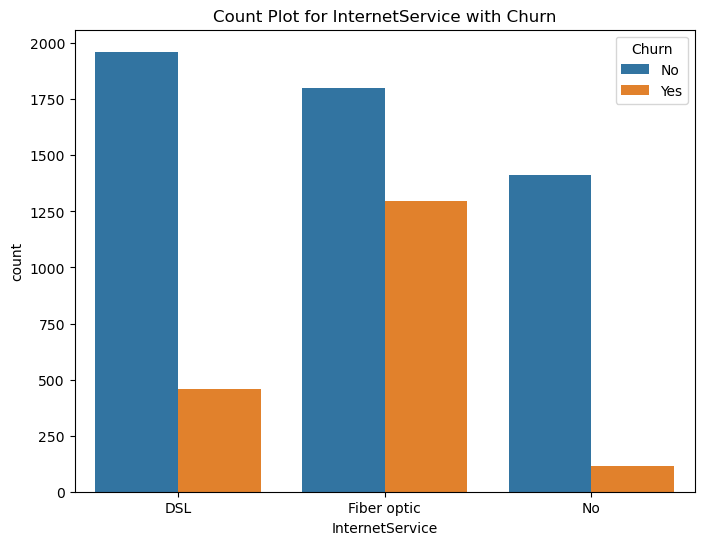


Cross Table for InternetService with Churn rates (Percentages)


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980
All,73.463013,26.536987


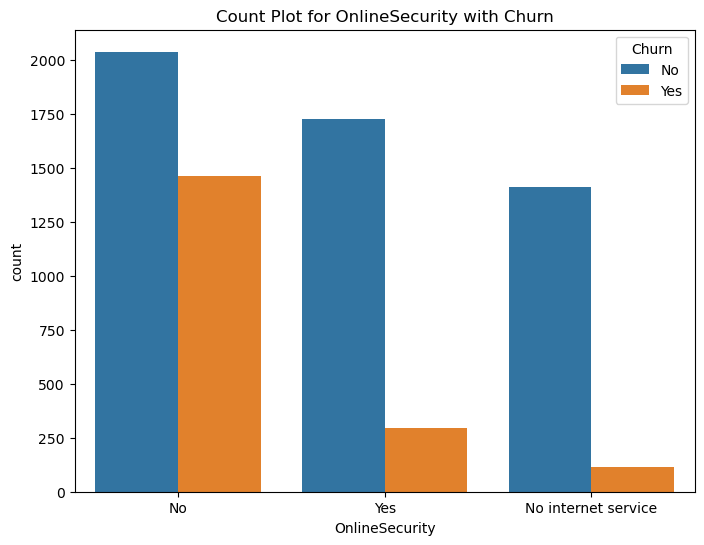


Cross Table for OnlineSecurity with Churn rates (Percentages)


Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194
All,73.463013,26.536987


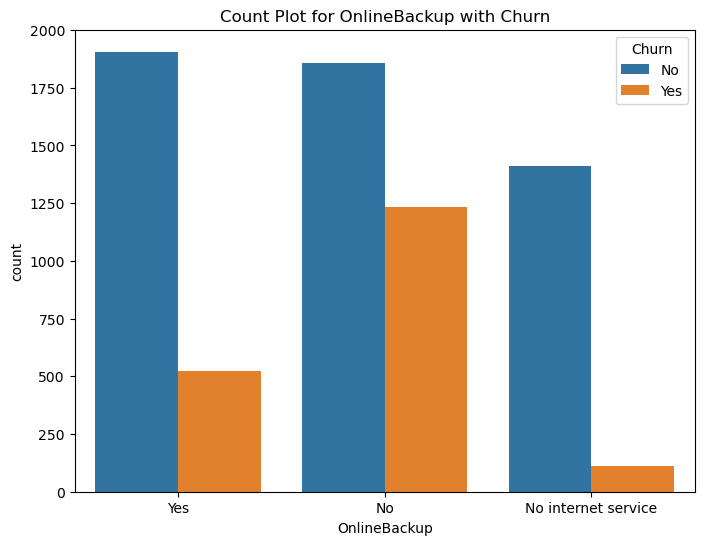


Cross Table for OnlineBackup with Churn rates (Percentages)


Churn,No,Yes
OnlineBackup,,
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494
All,73.463013,26.536987


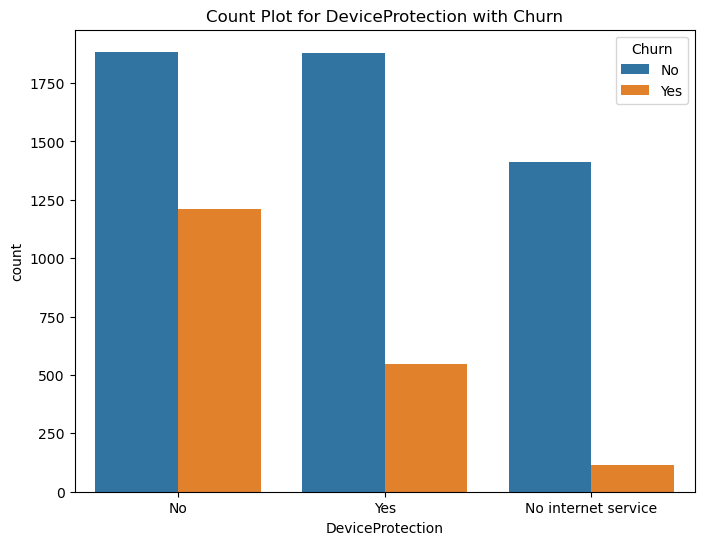


Cross Table for DeviceProtection with Churn rates (Percentages)


Churn,No,Yes
DeviceProtection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064
All,73.463013,26.536987


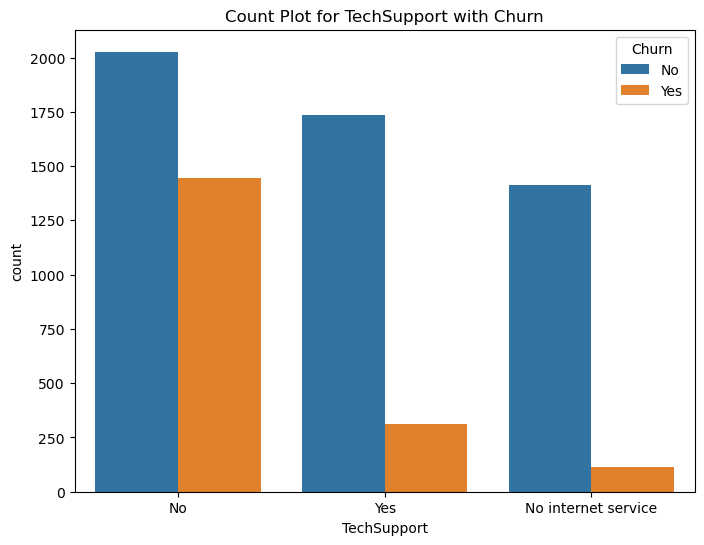


Cross Table for TechSupport with Churn rates (Percentages)


Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341
All,73.463013,26.536987


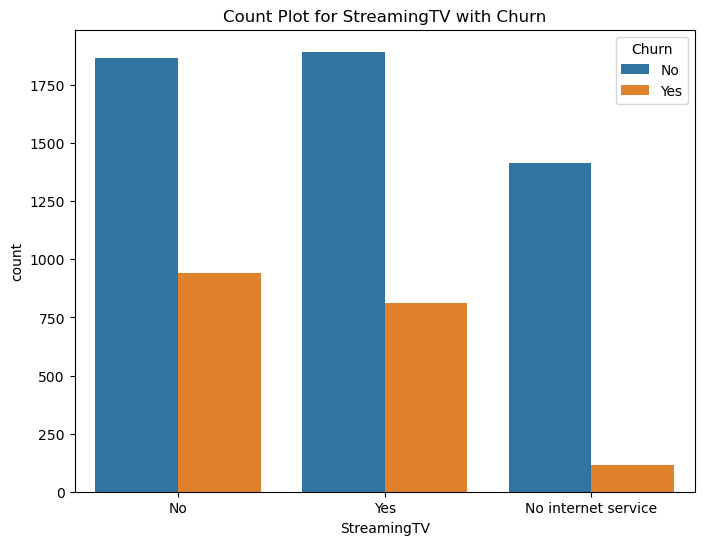


Cross Table for StreamingTV with Churn rates (Percentages)


Churn,No,Yes
StreamingTV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188
All,73.463013,26.536987


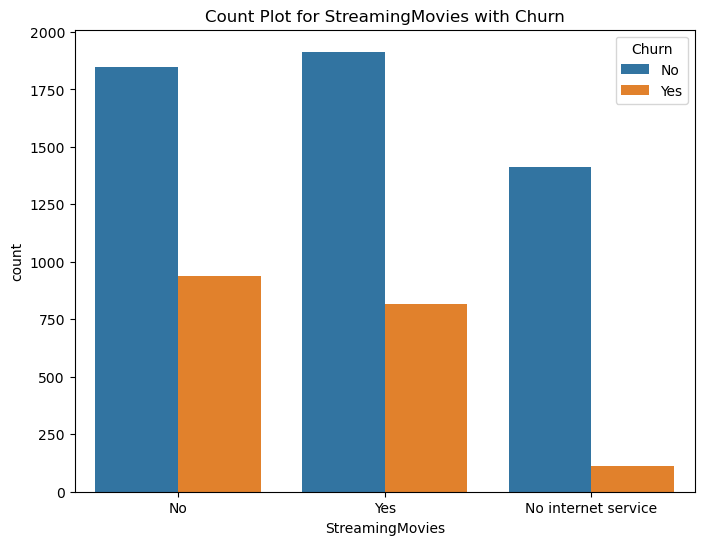


Cross Table for StreamingMovies with Churn rates (Percentages)


Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435
All,73.463013,26.536987


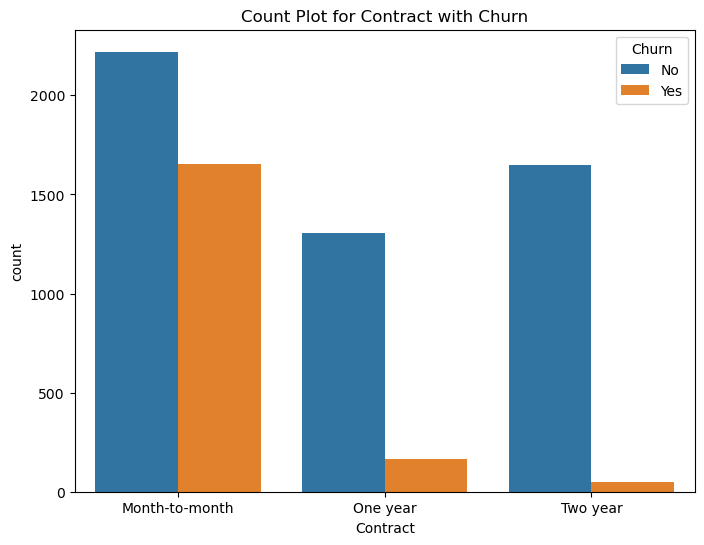


Cross Table for Contract with Churn rates (Percentages)


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858
All,73.463013,26.536987


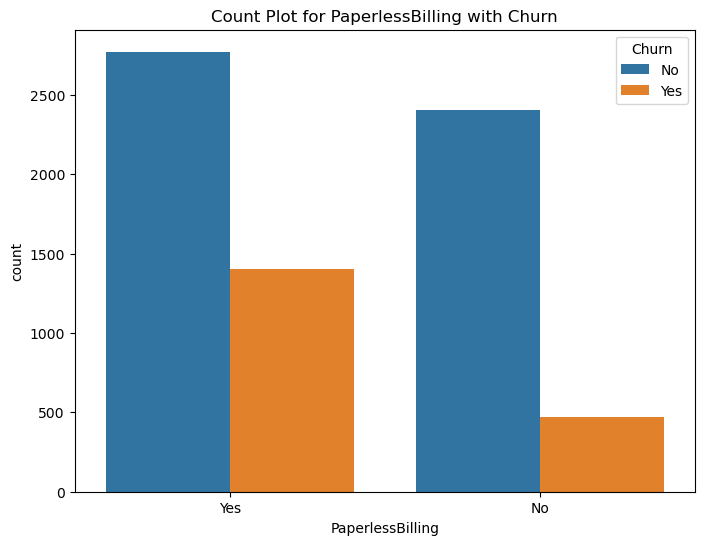


Cross Table for PaperlessBilling with Churn rates (Percentages)


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092
All,73.463013,26.536987


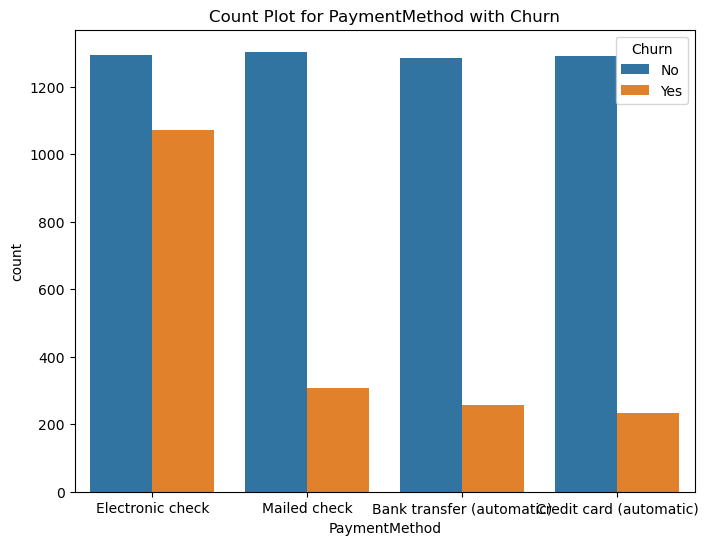


Cross Table for PaymentMethod with Churn rates (Percentages)


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700
All,73.463013,26.536987


In [9]:
categorical_columns = [ c for c in data.select_dtypes(include='object').columns if  c not in ["customerID", "Churn"]]
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, hue='Churn')
    plt.title(f'Count Plot for {column} with Churn')
    plt.show()
    cross_table = pd.crosstab(data[column], data['Churn'], margins=True, normalize='index') * 100
    
    # Print the cross table with percentages
    print(f'\nCross Table for {column} with Churn rates (Percentages)')
    display(cross_table)


**Observation**

- **Gender:** The churn rates are fairly balanced between genders, with approximately 26.9% for females and 26.2% for males.

- **Partner:** Customers without a partner have a higher churn rate (32.96%) compared to those with a partner (19.66%).

- **Dependents:** Customers without dependents tend to have a higher churn rate (31.28%) compared to those with dependents (15.45%).

- **PhoneService:** There is a slight difference in churn rates between customers with and without phone service, with a higher rate for those without (24.93% vs. 26.71%).

- **MultipleLines:** Customers with multiple lines have a slightly higher churn rate (28.61%) compared to those without (25.04%).

- **InternetService:** Fiber optic customers have a significantly higher churn rate (41.89%) compared to DSL (18.96%) and No internet service (7.40%).

- **OnlineSecurity:** Customers without online security have a higher churn rate (41.77%) compared to those with online security (14.61%).

- **TechSupport:** Customers without tech support have a higher churn rate (41.64%) compared to those with tech support (15.17%).

- **StreamingTV:** Customers without streaming TV have a slightly higher churn rate (33.52%) compared to those with streaming TV (30.07%).

- **Contract:** Month-to-month contract customers have a significantly higher churn rate (42.71%) compared to one-year (11.27%) and two-year (2.83%) contract customers.

- **PaperlessBilling:** Customers with paperless billing have a higher churn rate (33.57%) compared to those without (16.33%).

- **PaymentMethod:** Customers using Electronic check as their payment method have the highest churn rate (45.29%) compared to other payment methods.



#### Bivariate analyis: box plots for each numerical column with Churn

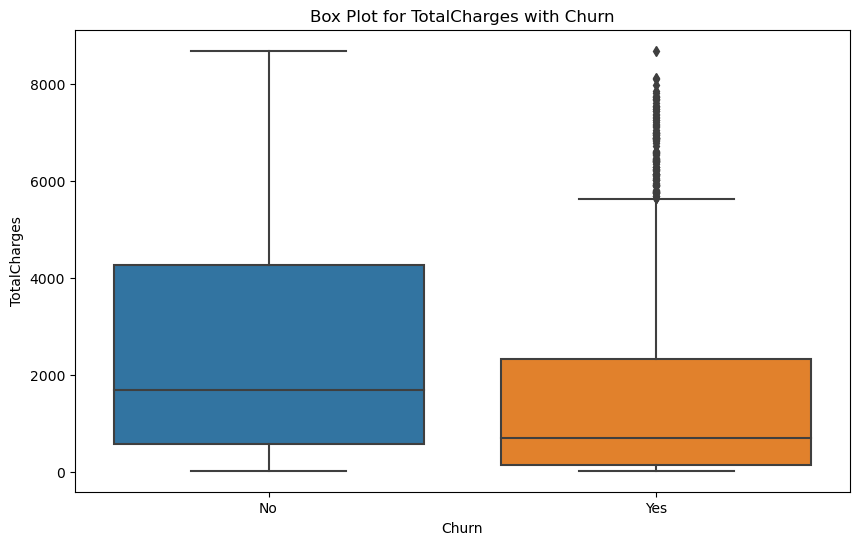

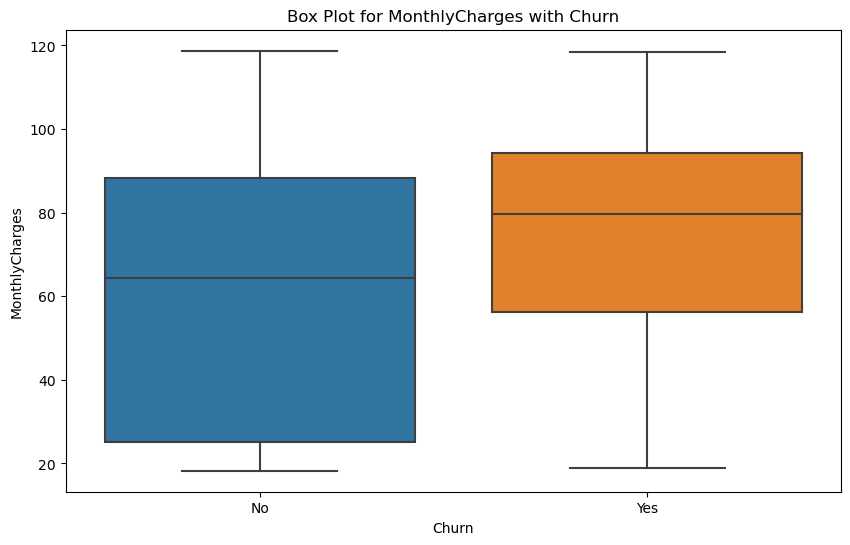

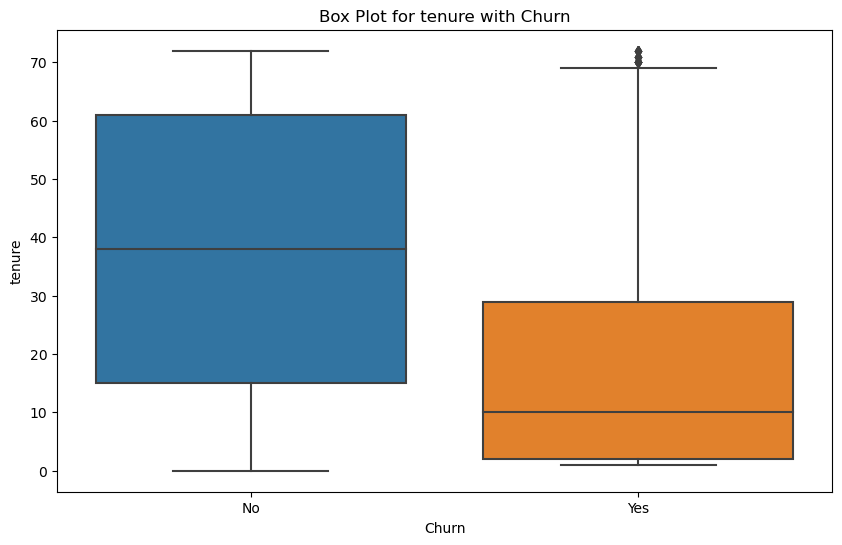

In [10]:
numerical_columns = ["TotalCharges", "MonthlyCharges", "tenure"]

# Create box plots for each numerical column with Churn
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=column, data=data)
    plt.title(f'Box Plot for {column} with Churn')
    plt.show()

**Observations**

- **Tenure:** There is a noticeable trend indicating that customers with longer tenures are less likely to churn compared to those with shorter tenures. 

- **Monthly Charges:** The box plot for monthly charges reveals that customers with lower monthly charges are less likely to churn compared to those with higher charges. 

# 3 Data Preparation
## 3.1 Handling missing values

In [11]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The total charges column wantains 11 missing values. To handle this missing values, we will use mean imputation

In [12]:
mean_total_charges = data["TotalCharges"].mean()
data["TotalCharges"].fillna(mean_total_charges, inplace=True)

## 3.2 Column transformation
converting categorical columns into numeric

In [13]:
data = data.drop(["customerID"], axis=1)

In [14]:

for column in data.select_dtypes(include='object').columns:
    data[column] = LabelEncoder().fit_transform(data[column])

## 3.3 Data Normalization
Normalize numerical colums using standard scaler

In [15]:
c = ["TotalCharges", "MonthlyCharges", "tenure"]
data[c] = StandardScaler().fit_transform(data[c])

## 3.4 Feature Selection

Based on the bivariate and univariate data analysis, the following variables are likely to influence the target variable (Churn):

- "Partner"
- "Dependents"
- "MultipleLines"
- "InternetService"
- "OnlineSecurity"
- "TechSupport"
- "DeviceProtection"
- "Contract"
- "PaperlessBilling"
- "PaymentMethod"
- "Tenure"
- "MonthlyCharges"


In [16]:
predictors = [
    "Partner",
    "Dependents",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "TechSupport",
    "DeviceProtection",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "tenure",
    "MonthlyCharges" 
]
X = data[predictors]
y = data["Churn"]

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.2)

# 4 Modeling

## 4.1 Model Training

Train Random Forest Classifier, Logistic Regression and SVC models

In [17]:
random_forest_model = RandomForestClassifier(random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)

random_forest_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## 4.2 Model Evaluation
### Confusion matrix


In [18]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()




Evaluation for Random Forest:
Accuracy: 0.7892
Confusion Matrix:


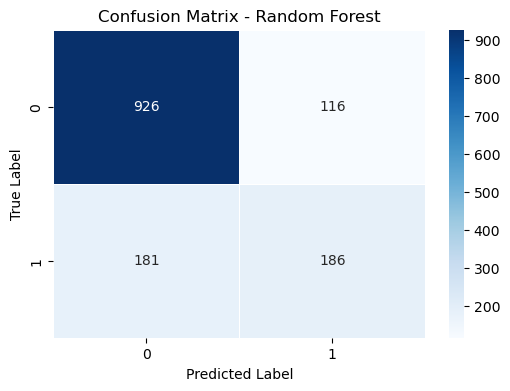

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1042
           1       0.62      0.51      0.56       367

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409




Evaluation for Logistic Regression:
Accuracy: 0.8006
Confusion Matrix:


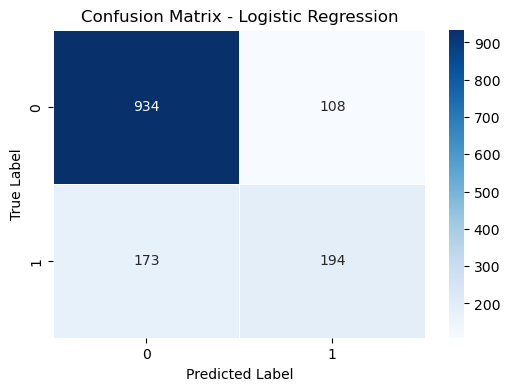

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.64      0.53      0.58       367

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409




Evaluation for Support Vector Machine:
Accuracy: 0.7885
Confusion Matrix:


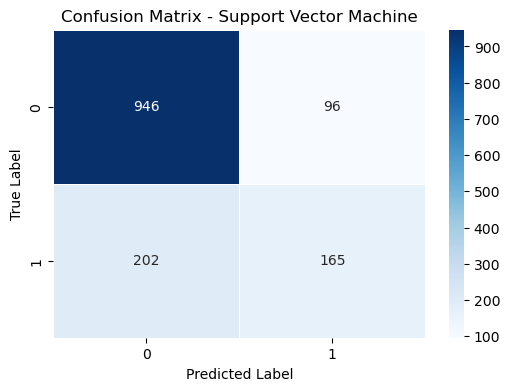

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1042
           1       0.63      0.45      0.53       367

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.78      1409



In [19]:
rf_predictions = random_forest_model.predict(X_test)
lr_predictions = logistic_regression_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluate models
models = ["Random Forest", "Logistic Regression", "Support Vector Machine"]

for i, predictions in enumerate([rf_predictions, lr_predictions, svm_predictions]):
    model_name = models[i]
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)

    print(f"\n\n\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:")
    plot_confusion_matrix(confusion_mat,model_name)
    print(f"Classification Report:")
    print(classification_rep)

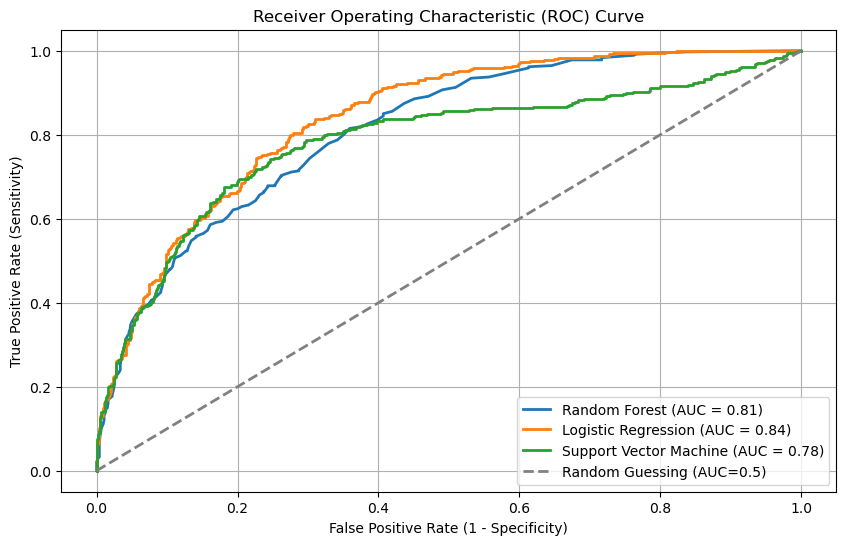

In [20]:
def plot_roc_curve(fpr, tpr, label, auc_score):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})', linewidth=2)

# Make predictions
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]
lr_probs = logistic_regression_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.decision_function(X_test)

# Compute ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

# Plot ROC curves with improved styling
plot_roc_curve(rf_fpr, rf_tpr, 'Random Forest', rf_auc)
plot_roc_curve(lr_fpr, lr_tpr, 'Logistic Regression', lr_auc)
plot_roc_curve(svm_fpr, svm_tpr, 'Support Vector Machine', svm_auc)

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing (AUC=0.5)', linewidth=2)

# Add labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

### Plot model important predictors



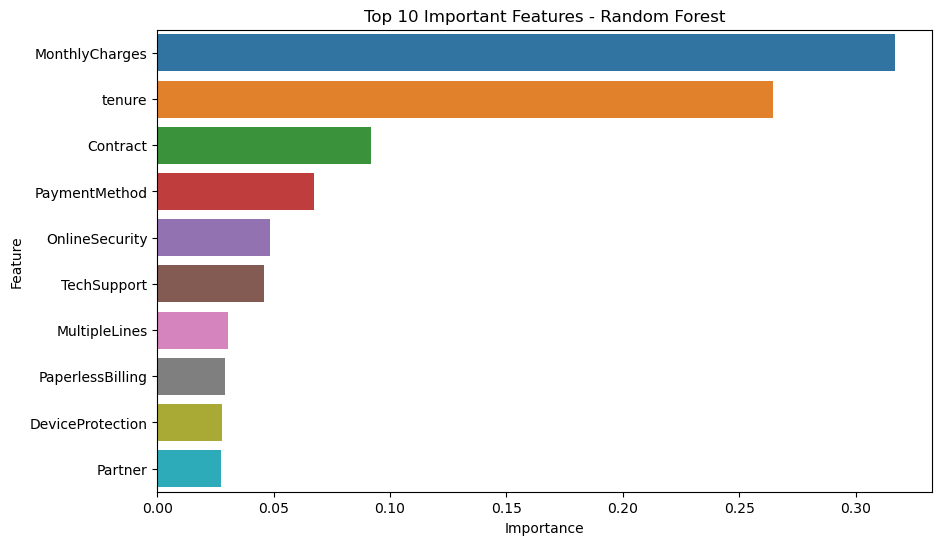

In [21]:
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n_features = 10  # Adjust this value based on your preference
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features))
plt.title(f'Top {top_n_features} Important Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Observations**

**Top Predictors:** The Random Forest classifier identified "Monthly Charges," "Tenure," "Contract," "Payment Method," and "Tech Support" as the top predictors for predicting customer churn.

**Model Performance:** The ROC curves for all models, especially the Logistic regression, are toward the top-left corner, indicating good performance in terms of true positive rate and low false positive rate.

# 5. Conclusion and Recommendations
Based on the analysis, the following recommendations are made:
- Deploy the Logistic Regression classifier as it demonstrated strong predictive performance with ROC of 0.83 
- Consider implementing targeted retention programs for customers with high monthly charges, short tenure, or those on month-to-month contracts.
- Evaluate and optimize pricing strategies, contract options, and customer support services based on the identified key predictors.


**References**

https://www.kaggle.com/datasets/blastchar/telco-customer-churn 